In [1]:
# ╔═ 1. IMPORT & LOAD DATA ══════════════════════════════════════════════
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from typing import Dict

In [2]:
# 1) Load
df = pd.read_csv("StudentsPerformance.csv")

# 2) Intip data
print("=== INFO ===")
df.info()
print("\n=== DESCRIBE ===")
print(df.describe())
print("\n=== HEAD ===")
print(df.head())


=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

=== DESCRIBE ===
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df["math score"].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

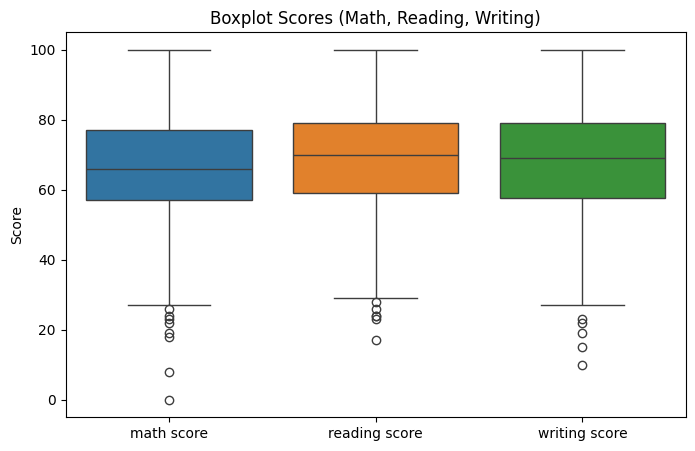

In [19]:
# Boxplot untuk math, reading & writing scores
plt.figure(figsize=(8,5))
sns.boxplot(data=df[["math score","reading score","writing score"]])
plt.title("Boxplot Scores (Math, Reading, Writing)")
plt.ylabel("Score")
plt.show()

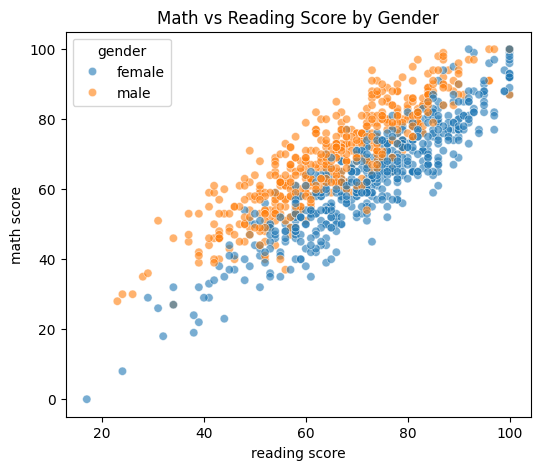

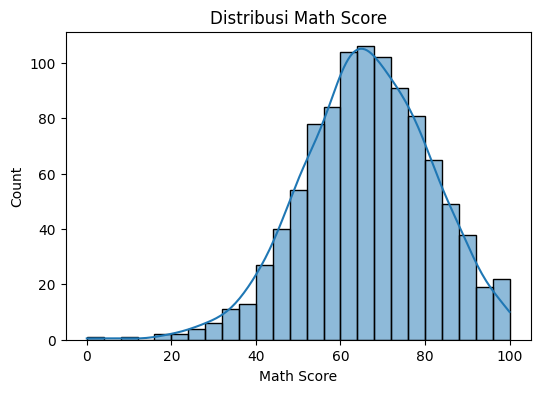

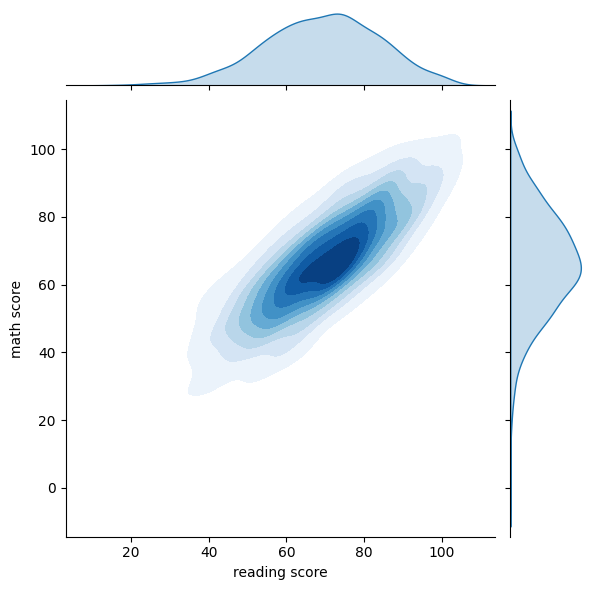

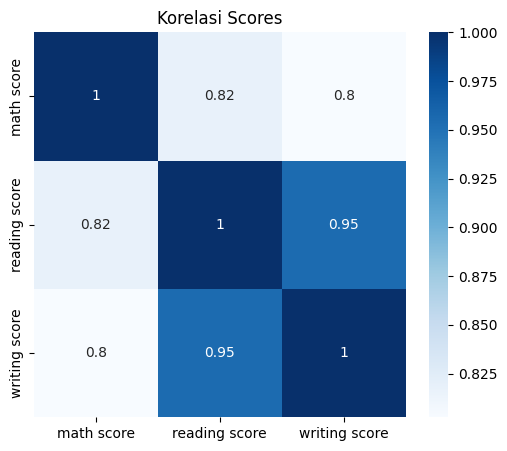

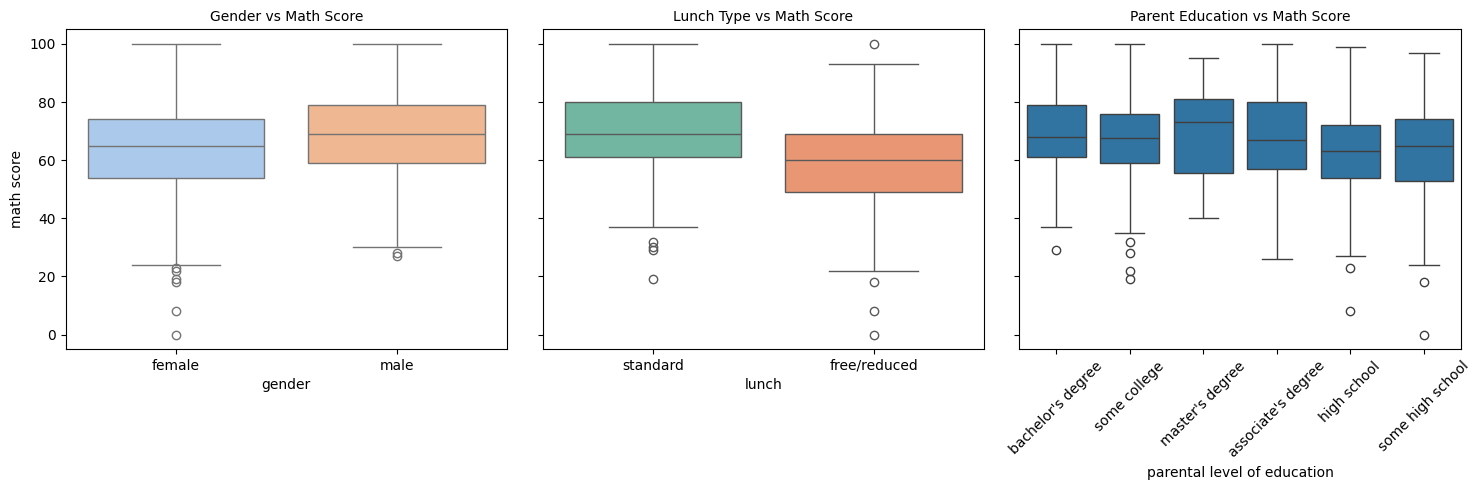

In [23]:
# ╔═ 2. EXPLORATORY DATA ANALYSIS (EDA) ══════════════════════════════════════

# 2.1 Scatterplot
plt.figure(figsize=(6,5))
sns.scatterplot(
    x="reading score", y="math score",
    hue="gender", data=df, alpha=0.6
)
plt.title("Math vs Reading Score by Gender")
plt.show()

# 2.2 Distribusi target (math score)
plt.figure(figsize=(6,4))
sns.histplot(df["math score"], kde=True)
plt.title("Distribusi Math Score")
plt.xlabel("Math Score")
plt.ylabel("Count")
plt.show()

# 2.3 Joint KDE untuk dua skor
import seaborn as sns
sns.jointplot(
    x="reading score", y="math score",
    data=df, kind="kde", fill=True, cmap="Blues"
)
plt.show()

# 2.4 Korelasi antar kolom numerik
plt.figure(figsize=(6,5))
corr = df[["math score","reading score","writing score"]].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Korelasi Scores")
plt.show()

# 2.5 Kode untuk Plot Hubungan Fitur & math score
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# 1. Gender vs math score
sns.boxplot(
    data=df, x='gender', y='math score', ax=axs[0],
    palette='pastel'
)
axs[0].set_title("Gender vs Math Score", fontsize=10)

# 2. Lunch vs math score
sns.boxplot(
    data=df, x='lunch', y='math score', ax=axs[1],
    palette='Set2'
)
axs[1].set_title("Lunch Type vs Math Score", fontsize=10)

# 3. Parental Level of Education vs math score
sns.boxplot(
    data=df, x='parental level of education',
    y='math score', ax=axs[2]
)
axs[2].set_title("Parent Education vs Math Score", fontsize=10)
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [4]:
# ╔═ 3. FEATURE ENGINEERING ══════════════════════════════════════════════

# 3.1 Hapus duplikat
n_dup = df.duplicated().sum()
print(f"Duplikat: {n_dup}")
df = df.drop_duplicates()

# 3.2 Cek missing
print("Missing per kolom:\n", df.isnull().sum())

# 3.3 Outlier analysis pada math score (IQR)
Q1 = df["math score"].quantile(0.25)
Q3 = df["math score"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["math score"] < Q1 - 1.5*IQR) | (df["math score"] > Q3 + 1.5*IQR)]
print(f"Jumlah outlier math score: {len(outliers)}")


# 3.4 Encoding fitur kategori
X = df.drop(columns=["math score"])
y = df["math score"]

X = pd.get_dummies(X, drop_first=True)
print("\nOne‑hot encoded columns:", X.shape[1], "features")


Duplikat: 0
Missing per kolom:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Jumlah outlier math score: 8

One‑hot encoded columns: 14 features


In [8]:
# ╔═ 4. MODELING ══════════════════════════════════════════════

# 4.1 Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4.2 Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 4.3 Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [14]:
# ╔═ 5. EVALUATION & CONCLUSION ══════════════════════════════════════════════

# 5.1 Hitung metrik
def eval_model(name, y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred) # Removed squared=False
    r2   = r2_score(y_true, y_pred)
    print(f"{name} → RMSE: {rmse:.2f}, R²: {r2:.3f}")

print("\n=== EVALUASI MODEL ===")
eval_model("LinearRegression", y_test, y_pred_lr)
eval_model("RandomForestRegressor", y_test, y_pred_rf)

# 5.2 Kesimpulan otomatis sederhana
print("\n=== KESIMPULAN ===")
if r2_score(y_test, y_pred_rf) > r2_score(y_test, y_pred_lr):
    print("Random Forest memiliki performa lebih baik (R² lebih tinggi & RMSE lebih rendah).")
else:
    print("Linear Regression memiliki performa lebih baik pada dataset ini.")


=== EVALUASI MODEL ===
LinearRegression → RMSE: 29.10, R²: 0.880
RandomForestRegressor → RMSE: 36.70, R²: 0.849

=== KESIMPULAN ===
Linear Regression memiliki performa lebih baik pada dataset ini.


In [16]:
from typing import Dict
from sklearn.metrics import mean_squared_error, r2_score

def evaluation(models: Dict[str, object],
               X_train: pd.DataFrame, X_test: pd.DataFrame,
               y_train: pd.Series, y_test: pd.Series
              ) -> pd.DataFrame:
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        pred_train = model.predict(X_train)
        pred_test  = model.predict(X_test)

        r2_train   = r2_score(y_train, pred_train)
        r2_test    = r2_score(y_test,  pred_test)
        rmse_train = mean_squared_error(y_train, pred_train)
        rmse_test  = mean_squared_error(y_test,  pred_test)

        results.append({
            "Model Name":    name,
            "R² Train":      r2_train,
            "R² Test":       r2_test,
            "RMSE Train":    rmse_train,
            "RMSE Test":     rmse_test
        })

    df_res = (
        pd.DataFrame(results)
          .sort_values(["R² Test","RMSE Test"], ascending=[False,True])
          .reset_index(drop=True)
    )
    df_res["Rank"] = df_res.index + 1
    return df_res

# Definisikan model set baru:
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor

models = {
    "LinearRegression":         LinearRegression(),
    "RidgeRegression":          Ridge(random_state=42),
    "Lasso":                    Lasso(random_state=42),
    "RandomForestRegressor":    RandomForestRegressor(random_state=42, max_depth=5),
    "XGBRegressor":             XGBRegressor(random_state=42, max_depth=5, n_estimators=100)
}

# Jalankan evaluation
evaluation_results = evaluation(models, X_train, X_test, y_train, y_test)
evaluation_results

,Model Name,R² Train,R² Test,RMSE Train,RMSE Test,Rank
0,LinearRegression,0.874317,0.880433,28.334870,29.095170,1
1,RidgeRegression,0.874308,0.880326,28.337051,29.121241,2
2,RandomForestRegressor,0.874339,0.857571,28.329892,34.658432,3
3,XGBRegressor,0.982216,0.836967,4.009417,39.672134,4
4,Lasso,0.814006,0.833603,41.931909,40.490702,5
